**Instructions.** In this practical, you will be guided to apply what you learn about regression, classification and clustering to some datasets. We provide more detailed explanations for some of the concepts introduced in lecture, and introduce some new concepts. This notebook also introduces and illustrates some useful R libraries for regression, classification and clustering. You will find some problems that you need to solve throughout the notebook. Place your answers in the cell below the problems, and you may add new cells if needed. Make sure your code is included in your answers.

You may find it helpful to read through the whole notebook and learn from the examples first, before solving the problems.

# Statistical Learning

## Supervised Learning

### Linear Regression

Let's load up Karl Pearsons' data on the heights (in inches) of fathers and their sons, produce a scatter plot of the data, and display standard summary statistics.

In [1]:
dev.new(width=5, height=4) # set the figure size to be 5in x 4in

    fheight         sheight     
 Min.   :59.00   Min.   :58.50  
 1st Qu.:65.80   1st Qu.:66.90  
 Median :67.80   Median :68.60  
 Mean   :67.69   Mean   :68.68  
 3rd Qu.:69.60   3rd Qu.:70.50  
 Max.   :75.40   Max.   :78.40  

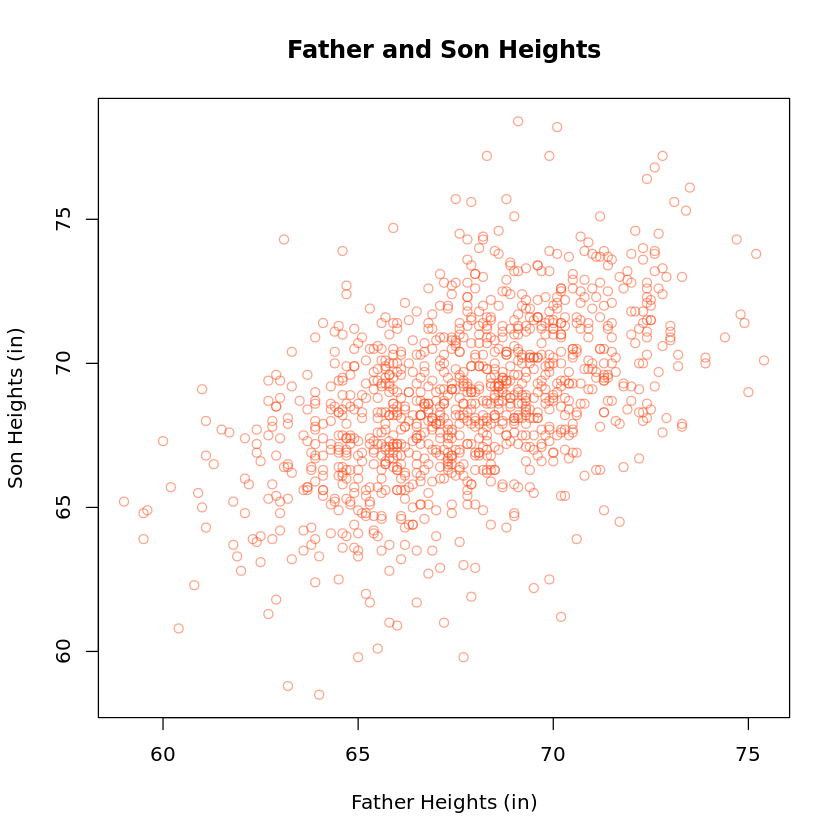

In [2]:
library("readr")
fheight<-read_csv("./PearsonFather.csv",col_names="fheight",col_types="d")
sheight<-read_csv("./PearsonSon.csv",col_names="sheight",col_types="d")
fs_height<-data.frame(fheight,sheight)
plot(fs_height$fheight,fs_height$sheight,main="Father and Son Heights", xlab="Father Heights (in)",ylab="Son Heights (in)",col=rgb(1,0.3,0.1,0.5))
summary(fs_height)

**Fitting a linear model.**
We will fit a linear regression model to this data using the built-in `lm` function, with Father Heights (in) as the predictor, and Son Heights (in) as the response. The following illustrates how this can be done. You can learn more about the function by running `help(lm)` to read the function's documentation. 

In [3]:
lmfit<-with(fs_height,lm(sheight~fheight))
summary(lmfit)


Call:
lm(formula = sheight ~ fheight)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8910 -1.5361 -0.0092  1.6359  8.9894 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.89280    1.83289   18.49   <2e-16 ***
fheight      0.51401    0.02706   19.00   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.438 on 1076 degrees of freedom
Multiple R-squared:  0.2512,	Adjusted R-squared:  0.2505 
F-statistic: 360.9 on 1 and 1076 DF,  p-value: < 2.2e-16


The summary information contains key information about the estimated model, including those that we covered in lecture.

|<center>TASK</center>|
| ---- |
| Write down the estimated relationship between son heights and father height (exclude the error term). Describe how father height affect son height.|

In [4]:
# [Place your Answer here]

# Coefficients:
#            Estimate
#(Intercept) 33.89280
# fheight    0.51401

#B0(y - Intercept) = 33.892980
#B1(Slope) = 0.51401

#y = B0 + B1*x
#sonhight = 33.89280 + 051401 * fatherhight

#Sonheight varies is a function of the father's height, as shown in the above equation.

**Checking model assumptions.**
Before taking the model seriously, we need to check whether the assumptions on our error model are satisfied. 

To do so, we need to explore the model's *residuals*, i.e., the differences between the actual values and the predicted values, or more precisely, the values of $y - \beta_{0} - \beta_{1} x$ for a simple linear model.

The assumption that we make on the residuals can be broken down into three assumptions
(1) zero mean; (2) constant variance, or homoscedasticity; and (3) normality.

Let's first extract the residuals, plot them, and compute summary statistics.

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-8.891001 -1.536099 -0.009209  0.000000  1.635924  8.989391 

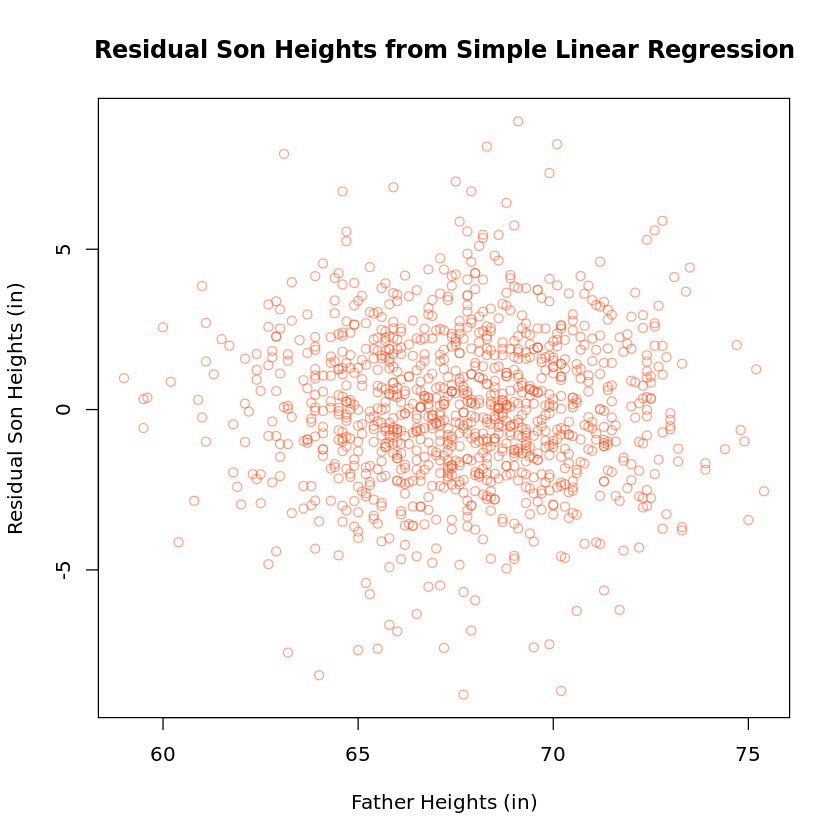

In [5]:
lmfit.res<-resid(lmfit)
plot(fs_height$fheight,lmfit.res,
     main="Residual Son Heights from Simple Linear Regression", 
     xlab="Father Heights (in)",
     ylab="Residual Son Heights (in)",
     col=rgb(1,0.3,0.1,0.5))
summary(lmfit.res)

By examining the plot above, Assumption (1) seems reasonable.  Assumption (2) seems to hold for Father Heights in the range from about 63 in to 71 in.  Outside this range, there may be some *heteroscedasticity* (change in the variability).  However, it is relatively mild, and we will proceed as though this assumption is satistfied.

To check Assumption (3), we will create a quantile-quantile (Q-Q) plot of the empirical distribution of the residuals against the standard normal distribution. A Q-Q plot for two distributions is a plot of the quantiles of one distribution against those of another. From a practical point of view, it is sufficient to know that if the residuals come from a normal distribution, the points in the Q-Q plot should approximately lie on a straight line. For those interested in better understanding the Q-Q plot, the Wikipedia article on Q-Q plot is a good reference: https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot.

A Q-Q plot can be conveniently generated in R using the `qqPlot` function from the `car` library. It allows us to generate the Q-Q plot together with a straight-line fit and pointwise 95% confidence intervals.

Loading required package: carData


[1]  851 1073

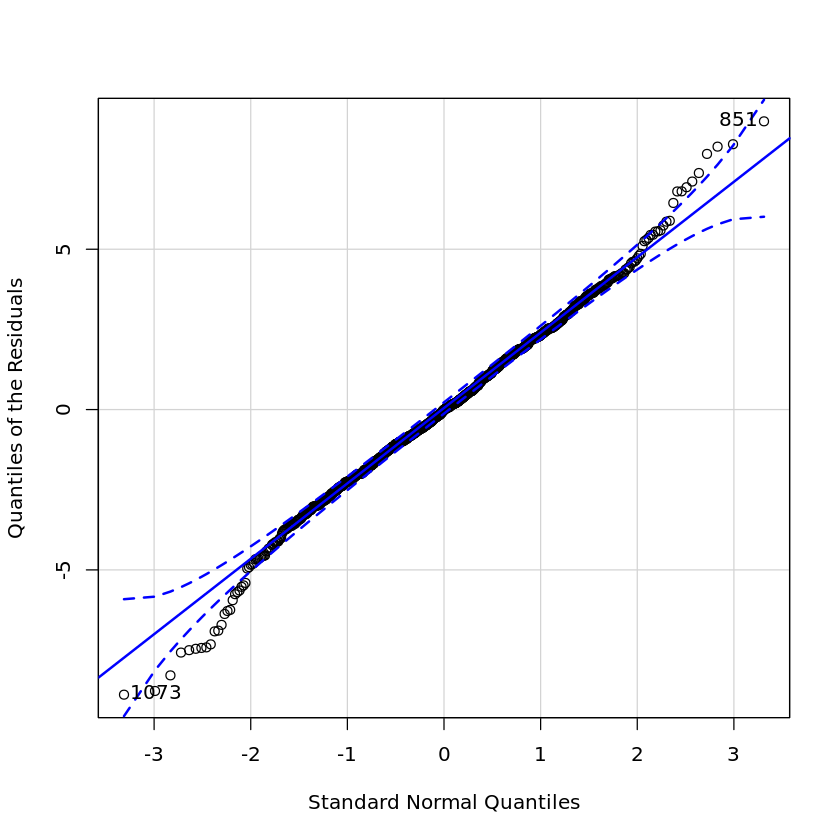

In [6]:
library("car")
qqPlot(lmfit.res,xlab="Standard Normal Quantiles",ylab="Quantiles of the Residuals")

As we can see from the plot, the bulk of the residual quantiles appear to follow a normal distribution, with slightly heavier left and right *tails*, suggesting a mild departure from the Assumption (3).

Besides using the Q-Q plot as a graphical test for Assumption (3), we can also formally test it by carrying out a Shapiro-Wilk test. The Shapiro-Wilk test computes a summary statistic $W$ from the residuals, and then computes the  whether probability (p-value) of observing the value of $W$ assuming the *null hypothesis* that the data come from a normal distribution. A small p-value indicates that something unusual happens if the null hypothesis is true, and thus we consider the null hypothesis unlikely.

In [7]:
shapiro.test(lmfit.res)


	Shapiro-Wilk normality test

data:  lmfit.res
W = 0.993, p-value = 5.679e-05


Since the p-value is very small, we reject the null hypothesis in favour of the alternative hypothesis that the data do not come from a normal distribution. This is in line with our Q-Q plot suspicion. What this implies is that strictly speaking, any further statistical test should be taken with a grain of salt. At the same time, note that the violation of the normality assumption appears to be mild (subjectively), and we may still proceed to take the model seriously for further analysis.

**Goodness of fit.**
Now, let's return to the model summary.

In [8]:
summary(lmfit)


Call:
lm(formula = sheight ~ fheight)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8910 -1.5361 -0.0092  1.6359  8.9894 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.89280    1.83289   18.49   <2e-16 ***
fheight      0.51401    0.02706   19.00   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.438 on 1076 degrees of freedom
Multiple R-squared:  0.2512,	Adjusted R-squared:  0.2505 
F-statistic: 360.9 on 1 and 1076 DF,  p-value: < 2.2e-16


Because the p-values for both intercept and fheight are extremely small, this suggests that they are unlikely to be equal to zero.  

|<center>TASK</center>|
| ---- |
| What is the interpretation of the R-squared value of 0.2512? |

In [10]:
# [Place your Answer here]
#R-squared= Explained variation / Total variation
#It means that 25.12% of variation in the height of son can be explained by the height of father

**Uncertainty in model parameters.**
The estimated parameters are random, because they are computed from a random sample from a simple linear model. If the data is indeed generated by a simple linear model, then when the sample size is large, the estimated parameters will be close to the true parameters. The confidence interval (CI) is often used as a way to describe how accurate the estimates are. A CI with confidence level $p$ is an interval that has probability $p$ of containing the true value. Be very careful when interpreting this statement: here the true value is unknown but fixed, and the CI is random (due to randomness in the sample). The statement thus means that if we use the same procedure to construct a level $p$ CI on many many samples, a fraction $p$ of the intervals will contain the true value.

In R, the `confint` function can be used to obtain confidence intervals. By default, a 95% confidence interval is returned.

In [11]:
confint(lmfit)

,2.5 %,97.5 %
(Intercept),30.2963477,37.489253
fheight,0.4609158,0.567096


Thus a 95% CI for the intercept is [30.2963477, 37.489253], and a 95% CI for fheight is [0.4609158, 0.567096]. It should be emphasized that once the CIs have been calculated, the true parameters are either in the intervals or not. What we can say is that a larger CI indicates higher uncertainty in the estimate.

**Predition.**
We can use the fitted linear model to make predictions on data. Such predictions are uncertain as well, and 
we can construct confidence intervals for the predictions to quantify our degree of uncertainty in the prediction. If the estimated linear equation is $y = \hat{\beta}_{0} + \hat{\beta}_{1} x$, then given any $x$, we can simply use the RHS as a point estimate. This can be done using the `predict` function as illustrated below.

In [12]:
predict(lmfit, data.frame(fheight=67))

1 
68.3312

Note that if you want to read the documentation of the `predict` function, you need to type `help(predict.lm)` in this case.

|<center>TASK</center>|
| ---- |
| Manually calculate the fitted linear model's predicted sheight given fheight=67 in (use a calculator if needed). Show your working.|

**[Place your Answer here]**
predicted_sonheight = B0 + B1 * fatherheight; 
fit_predicted_sonheitht = 33.89280 + 0.51401 * 67 = 68.33147

The point prediction above is generally different from the true value due to two sources of randomness: (a) the estimated parameters are random and only approximate; (b) the simple linear model has an error term. 

When we consider the uncertainty in the prediction, we may only consider (a), or consider both (a) and (b). If we consider only (a), we can construct a confidence interval for $\hat{\beta}_{0} + \hat{\beta}_{1} x$ - while the distribution of this prediction has a very complex form, we can again use the `predict` function to help us to obtain a CI. A 95% CI for sheight when fheight=67 in is given below.

In [13]:
predict(lmfit,data.frame(fheight=67),interval="confidence",level = 0.95,type="response")

,fit,lwr,upr
1,68.3312,68.18099,68.4814


Now, let's construct a plot of the data, the fitted regression line, and a pointwise 95% confidence interval for the regression line.

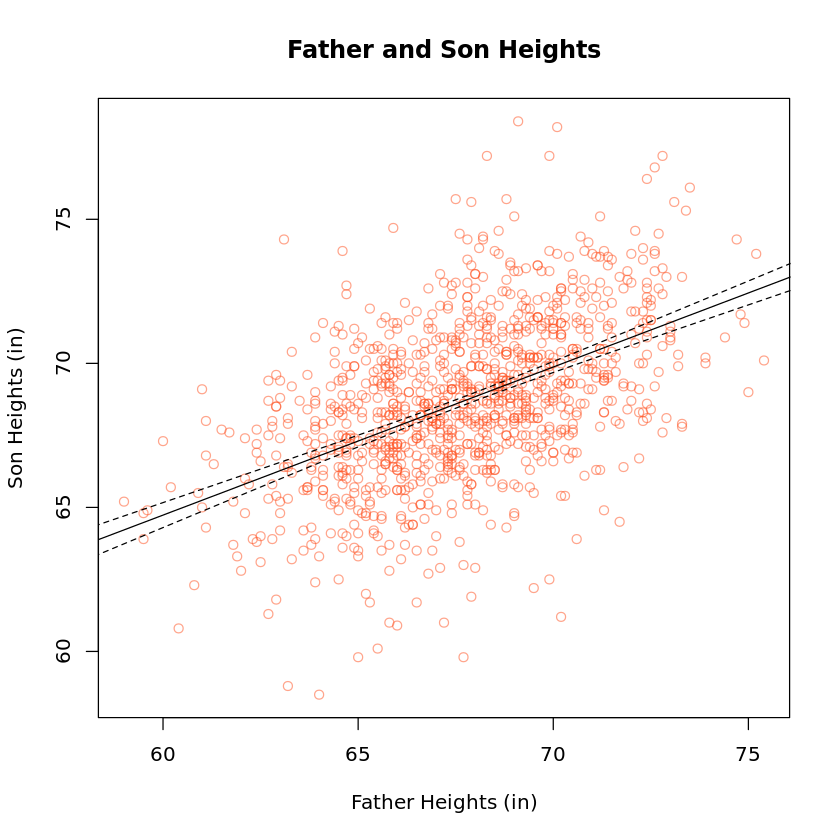

In [14]:
newfheight<-seq(min(fheight$fheight)-1, max(fheight$fheight)+1, by=0.1)
lmfitci<-predict(lmfit,data.frame(fheight=newfheight),interval="confidence",level = 0.95,type="response")
plot(fs_height$fheight,fs_height$sheight,main="Father and Son Heights", xlab="Father Heights (in)",ylab="Son Heights (in)",col=rgb(1,0.3,0.1,0.5))
lines(newfheight,lmfitci[,1],col="black",lty=1)
lines(newfheight,lmfitci[,2],col="black",lty=2)
lines(newfheight,lmfitci[,3],col="black",lty=2)

Frequently, we are often interested to take both the uncertainty in the parameter estimates and the uncertainty due to the error term into account, and produce an interval that captures both forms of uncertainty. This would give us the typical range of responses be for a particular predictor value.

Such interval is called a *prediction interval*.  Let's construct a 95% prediction interval for a predictor of 67 in.

In [15]:
predict(lmfit,data.frame(fheight=67),interval="predict",level=0.95,type="response")

,fit,lwr,upr
1,68.3312,63.5448,73.11759


You will notice immediately that this interval is significantly wider than the confidence interval we computed earlier.

|<center>TASK</center>|
| ---- |
| Construct a plot of the data, the fitted regression line, and a pointwise 95% prediction interval for the regression line.|

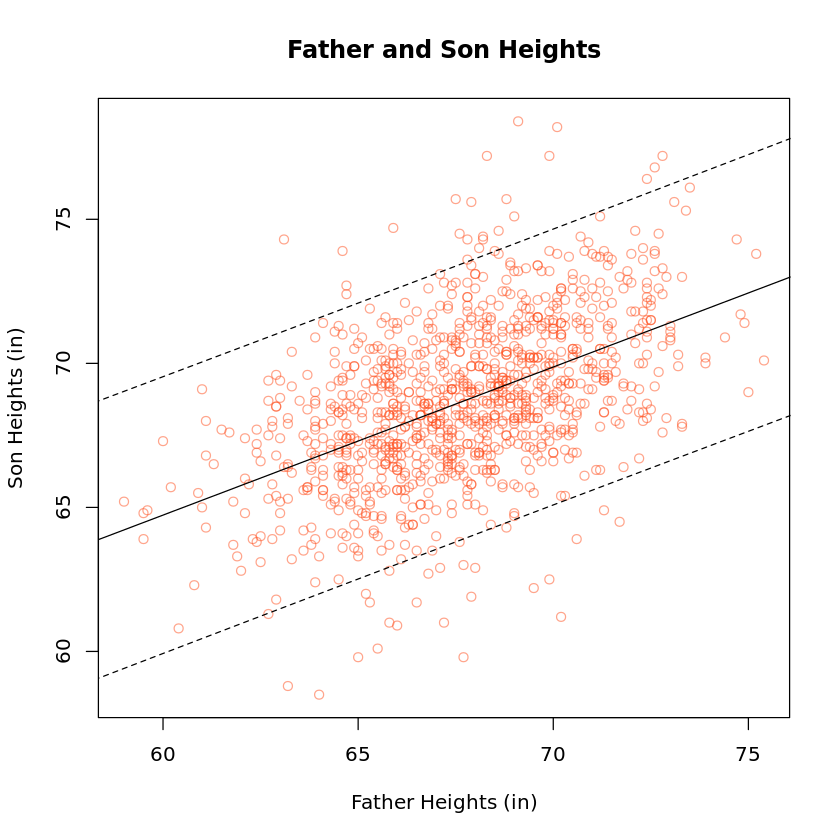

In [16]:
# [Place your Answer here]
newfheight<-seq(min(fheight$fheight)-1, max(fheight$fheight)+1, by=0.1)
lmfitci<-predict(lmfit, data.frame(fheight=newfheight), interval='prediction',level=0.95,type='response')
plot(fs_height$fheight,fs_height$sheight,main='Father and Son Heights', xlab='Father Heights (in)',ylab='Son Heights (in)',col=rgb(1,0.3,0.1,0.5))
lines(newfheight,lmfitci[,1],col='black',lty=1)
lines(newfheight,lmfitci[,2],col='black',lty=2)
lines(newfheight,lmfitci[,3],col='black',lty=2)

|<center>TASK</center>|
| ---- |
| For the (fheight, sheight) pairs in the dataset, calculate the proportion of sheight that fall into the 95% prediction interval for fheight.|

In [19]:
# [Place your Answer here]
limits = predict(lmfit, data.frame(fheight=fs_height$fheight),interval='predict',level=0.95,type='response')
count_table = fs_height$sheight>=limits[,2]&fs_height$sheight<=limits[,3]
pos = length(count_table[count_table==TRUE])
sprintf('%i : %i',pos, length(count_table))
pos/length(count_table)

[1] "1028 : 1078"

[1] 0.9536178

All the above analysis has been carried out on the training set only. To evaluate whether the simple linear model can possibly generalize to new data, we need to train it on a training set, and evaluate it on a test set.
Let's first construct a 70/30 train-test split using Pearson's dataset.

In [20]:
set.seed(107)
N = length(fheight$fheight)
trainidx = sample(1:N, floor(0.7*N), replace=FALSE)
tr = data.frame(fheight=fheight$fheight[trainidx], sheight=sheight$sheight[trainidx])
ts = data.frame(fheight=fheight$fheight[-trainidx], sheight=sheight$sheight[-trainidx])

|<center>TASK</center>|
| ---- |
| Train a simple linear model using the training set (fheight_tr, sheight_tr). Report the MSEs of the model on the training set (fheight_tr, sheight_tr) and the test set (fheight_ts, sheight_ts). Compare the MSEs and comment on the model's ability to generalize to new examples.


Call:
lm(formula = sheight ~ fheight)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.9089 -1.5003  0.0049  1.6037  8.1746 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 32.99259    2.26737   14.55   <2e-16 ***
fheight      0.52757    0.03349   15.75   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.487 on 752 degrees of freedom
Multiple R-squared:  0.2481,	Adjusted R-squared:  0.2471 
F-statistic: 248.2 on 1 and 752 DF,  p-value: < 2.2e-16


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-8.908905 -1.500256  0.004879  0.000000  1.603690  8.174554 

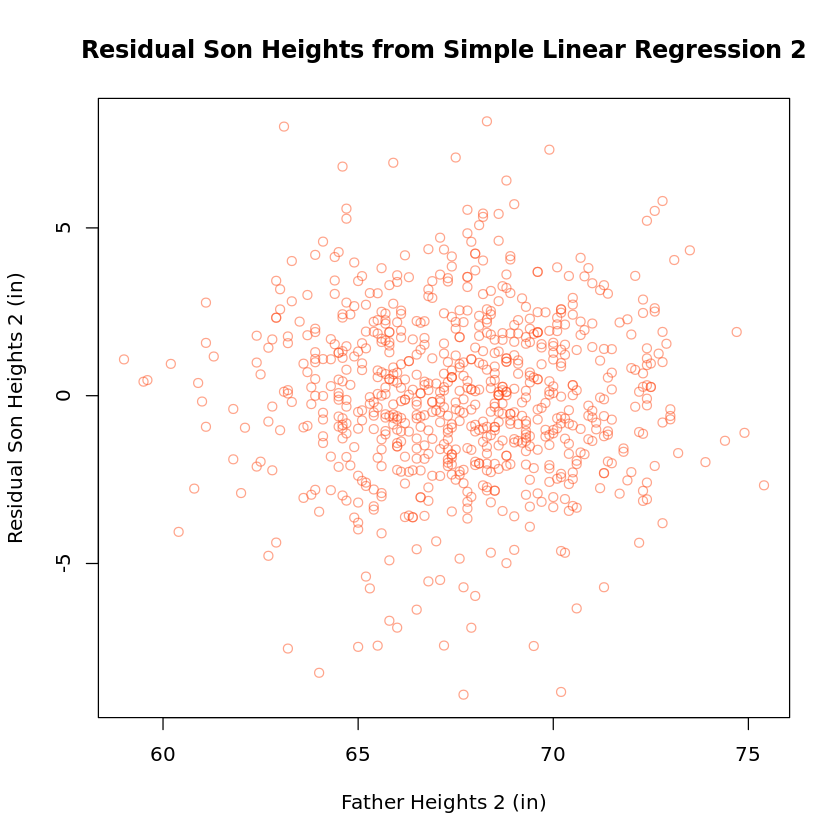

In [21]:
# [Place your Answer here]
lmfit_new <- with(tr,lm(sheight~fheight))
summary(lmfit_new)
lmfit_new.res <- resid(lmfit_new)
plot(tr$fheight,lmfit_new.res,
     main="Residual Son Heights from Simple Linear Regression 2", 
     xlab="Father Heights 2 (in)",
     ylab="Residual Son Heights 2 (in)",
     col=rgb(1,0.3,0.1,0.5))
summary(lmfit_new.res)

training_results = predict(lmfit_new, data.frame(fheight=tr$fheight))
resid_results = training_results - tr[,2]
training_square = resid_results * resid_results
mse_training = sum(training_square)/length(training_square)

### Logistic Regression

Let's return to the HR analytics data from Prac. 3.

To think about trying to predict the likelihood of our best and most experienced employees leaving based on the average monthly hours worked.

To that end, we'll load up the data and subset out the best (evaluation of 0.8 or higher) and the most experienced employees (with the company for 4 or more years).  We'll also create a training and test set.

In [22]:
library("readr")
HR_comma_sep <- read_csv("https://stluc.manta.uqcloud.net/mdatascience/public/datasets/HumanResourceAnalytics/HR_comma_sep.csv")
HR_best <- HR_comma_sep[(HR_comma_sep$last_evaluation>=0.8)&(HR_comma_sep$time_spend_company>=4),]
head(HR_best,10)
summary(HR_best)
set.seed(8888) # Set a seed for the random number generator;
trainidx<-sample(nrow(HR_best), floor(nrow(HR_best) * 0.5))
HR_best_train<-HR_best[trainidx,]
HR_best_test<-HR_best[-trainidx,]

Parsed with column specification:
cols(
  satisfaction_level = col_double(),
  last_evaluation = col_double(),
  number_project = col_integer(),
  average_montly_hours = col_integer(),
  time_spend_company = col_integer(),
  Work_accident = col_integer(),
  left = col_integer(),
  promotion_last_5years = col_integer(),
  sales = col_character(),
  salary = col_character()
)


satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0.80,0.86,5,262,6,0,1,0,sales,medium
0.11,0.88,7,272,4,0,1,0,sales,medium
0.72,0.87,5,223,5,0,1,0,sales,low
0.92,0.85,5,259,5,0,1,0,sales,low
0.89,1.00,5,224,5,0,1,0,sales,low
0.11,0.81,6,305,4,0,1,0,sales,low
0.84,0.92,4,234,5,0,1,0,sales,low
0.78,0.99,4,255,6,0,1,0,sales,low
0.76,0.89,5,262,5,0,1,0,sales,low
0.11,0.83,6,282,4,0,1,0,sales,low


 satisfaction_level last_evaluation  number_project  average_montly_hours
 Min.   :0.0900     Min.   :0.8000   Min.   :2.000   Min.   : 96.0       
 1st Qu.:0.1100     1st Qu.:0.8500   1st Qu.:4.000   1st Qu.:210.0       
 Median :0.6500     Median :0.9000   Median :5.000   Median :245.0       
 Mean   :0.5323     Mean   :0.9019   Mean   :4.758   Mean   :234.6       
 3rd Qu.:0.8200     3rd Qu.:0.9500   3rd Qu.:6.000   3rd Qu.:267.0       
 Max.   :1.0000     Max.   :1.0000   Max.   :7.000   Max.   :310.0       
 time_spend_company Work_accident          left       promotion_last_5years
 Min.   : 4.00      Min.   :0.00000   Min.   :0.000   Min.   :0.00000      
 1st Qu.: 4.00      1st Qu.:0.00000   1st Qu.:0.000   1st Qu.:0.00000      
 Median : 5.00      Median :0.00000   Median :1.000   Median :0.00000      
 Mean   : 4.89      Mean   :0.09688   Mean   :0.581   Mean   :0.01541      
 3rd Qu.: 5.00      3rd Qu.:0.00000   3rd Qu.:1.000   3rd Qu.:0.00000      
 Max.   :10.00      Max.  

Next, we'll plot `left` vs `Average Monthly Hours` in our training set as a scatterplot.

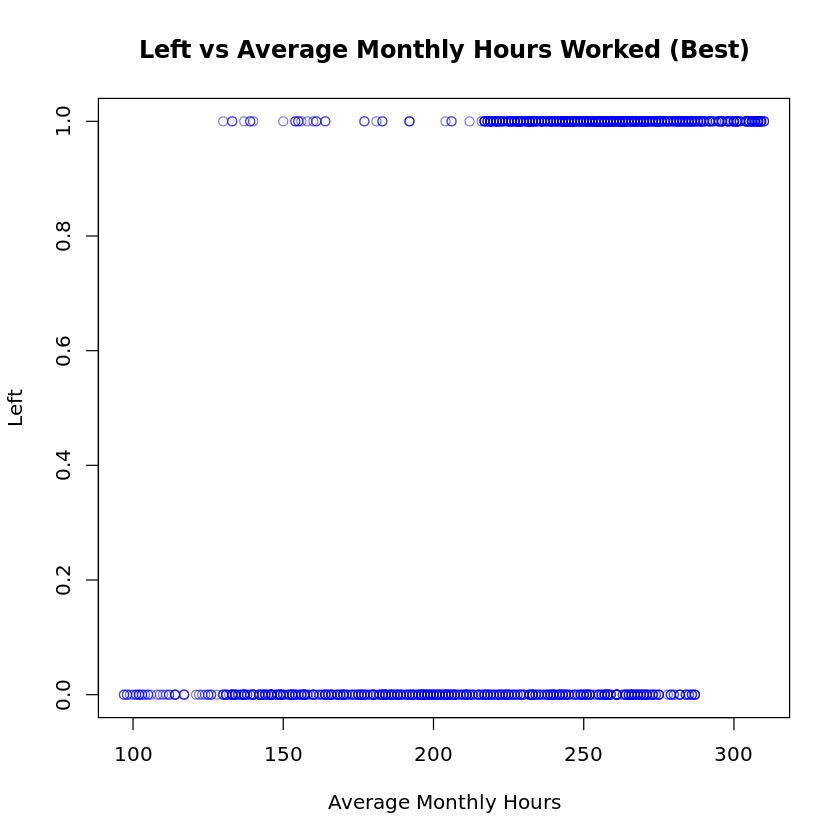

In [23]:
plot(HR_best_train$average_montly_hours,HR_best_train$left,main="Left vs Average Monthly Hours Worked (Best)", xlab="Average Monthly Hours",ylab="Left",col=rgb(0,0,1,0.5))

It is clear from this plot that the more hours they work on average, the more likely that the best and most experienced employees will leave.

Let's fit a logistic regression model to the data, and plot the resulting regression curve. This can be done using the built-in `glm` function, with the `family` argument set to `binomial`.


Call:
glm(formula = left ~ average_montly_hours, family = binomial, 
    data = HR_best_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1575  -0.6865   0.4231   0.7786   2.6275  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -8.09314    0.47513  -17.03   <2e-16 ***
average_montly_hours  0.03595    0.00199   18.07   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1994.3  on 1459  degrees of freedom
Residual deviance: 1405.3  on 1458  degrees of freedom
AIC: 1409.3

Number of Fisher Scoring iterations: 5


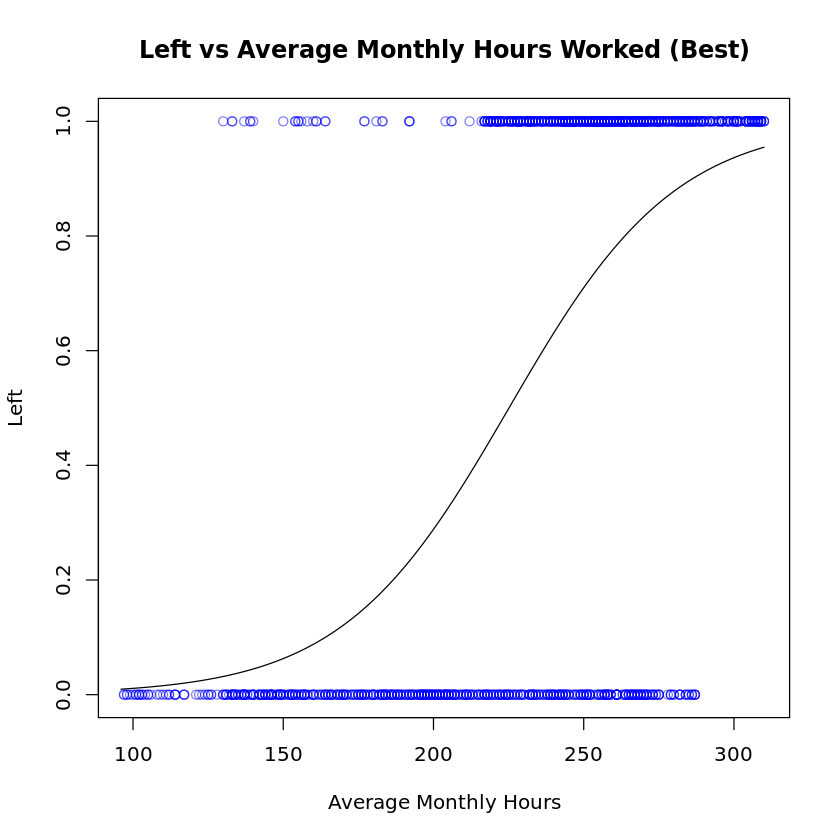

In [24]:
logfit<-glm(left~average_montly_hours,data=HR_best_train,family=binomial)
summary(logfit)
newamh<-seq(96,310)
predprobs<-predict(logfit,data.frame(average_montly_hours=newamh),type="response")
plot(HR_best_train$average_montly_hours,HR_best_train$left,main="Left vs Average Monthly Hours Worked (Best)", xlab="Average Monthly Hours",ylab="Left",col=rgb(0,0,1,0.5))
lines(newamh,predprobs,col="black",lty=1)

|<center>TASK</center>|
| ---- |
| What is the interpretation of the estimated coefficient for `average_montly_hours` ? |

**[Place your Answer here]**
It indicates that the majority of staff who has left the company usually works more than 200 hours a month.

### Classification

We can use a threshold together with the regression curve to create two groups.  We can also observe the training error and test error we make.

Let's start with a threshold of 0.5.

In [25]:
HR_best_train$probs<-predict(logfit,data.frame(average_montly_hours=HR_best_train$average_montly_hours),type="response")
HR_best_train$predleft<-as.integer(HR_best_train$probs>=0.5)
table(HR_best_train$predleft,HR_best_train$left)

HR_best_test$probs<-predict(logfit,data.frame(average_montly_hours=HR_best_test$average_montly_hours),type="response")
HR_best_test$predleft<-as.integer(HR_best_test$probs>=0.5)
table(HR_best_test$predleft,HR_best_test$left)

   
      0   1
  0 416  86
  1 210 748

   
      0   1
  0 375  75
  1 223 788

|<center>TASK</center>|
| ---- |
| What are the (1) error rate, (2) sensitivity, (3) specificity, and (4) precision in Training and Testing for this classifier? |

**[Place your Answer here]**
(1):error rate = (FP + FN) / (FP + FN + TP + TN) = training=0.2027 or testing=0.2040 
(2):sensitivity = TP / (TP + FN) = training=0.8969 or testing=0.9131
(3):specificity = TN / (TN + FP) = training=0.6645 or testing=0.6271
(4):precision = TP / (TP + FP) = training=0.7808 or testing=0.7794

|<center>TASK</center>|
| ---- |
| Perform two fold cross-validation (CV) of the logistic regression classifier above on the training set. Report the cross-validation error (the average of the error rates on the two folds). |

In [29]:
# [Place your Answer here]
set.seed(8888)
trainidx1<-sample(nrow(HR_best_train), floor(nrow(HR_best_train) * 0.5))
train1<-HR_best_train[trainidx1,]
train2<-HR_best_train[-trainidx1,]


train1$probs<-predict(logfit,data.frame(average_montly_hours=train1$average_montly_hours),type="response")
train1$predleft<-as.integer(train1$probs>=0.5)
table(train1$predleft,train1$left)

train2$probs<-predict(logfit,data.frame(average_montly_hours=train2$average_montly_hours),type="response")
train2$predleft<-as.integer(train2$probs>=0.5)
table(train2$predleft,train2$left)

#error_train1 = (FP + FN) / (FP + FN + TP + TN) = 0.2164
#error_train2 = (FP + FN) / (FP + FN + TP + TN) = 0.1890

   
      0   1
  0 197  52
  1 106 375

   
      0   1
  0 219  34
  1 104 373

The quantities we computed above were just for a single choice of threshold.  We can gauge the tradeoff between true positive rates (sensitivity) and false positive rates (1-specificity) by trying all possible thresholds. This allows us to generate a plot of true positive rate against the false positive rate - a curve known the ROC (receiver operating characteristic) curve.

We'll do this now for both the training data, as well as computing the AUC (Area Under the Curve).

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



[1] 0.8280602

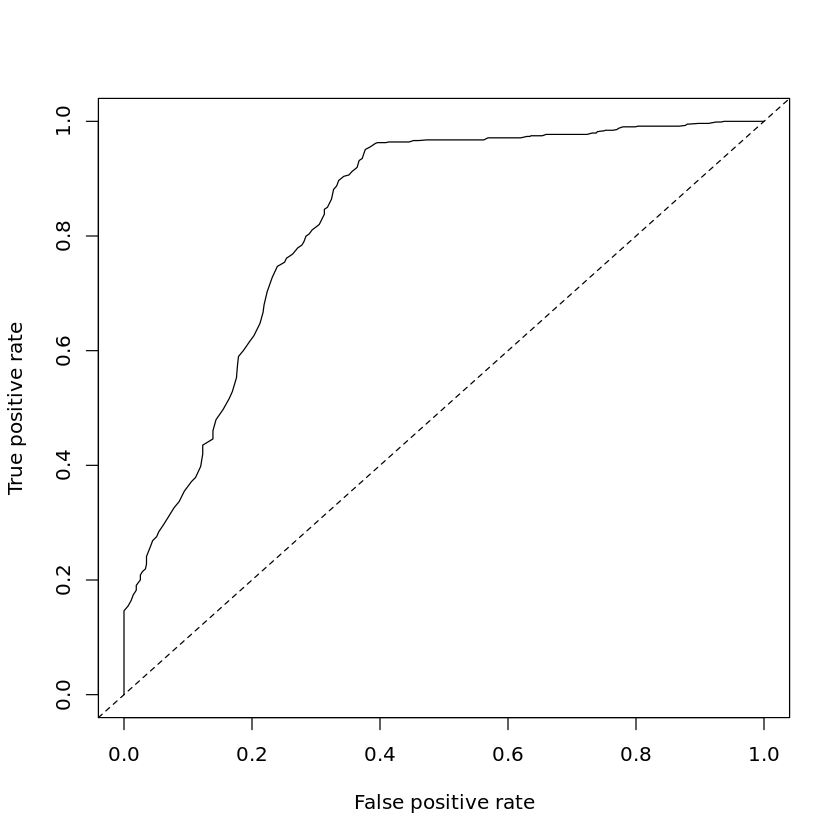

In [30]:
library("ROCR")
trainROC<-performance(prediction(HR_best_train$probs,HR_best_train$left),"tpr","fpr")
plot(trainROC)
abline(a=0, b= 1,lty=2)
trainAUC<-as.double(performance(prediction(HR_best_train$probs,HR_best_train$left),"auc")@y.values)
trainAUC

|<center>TASK</center>|
| ---- |
| Construct the ROC curve for the test data, and compute the AUC. |

[1] 0.8313294

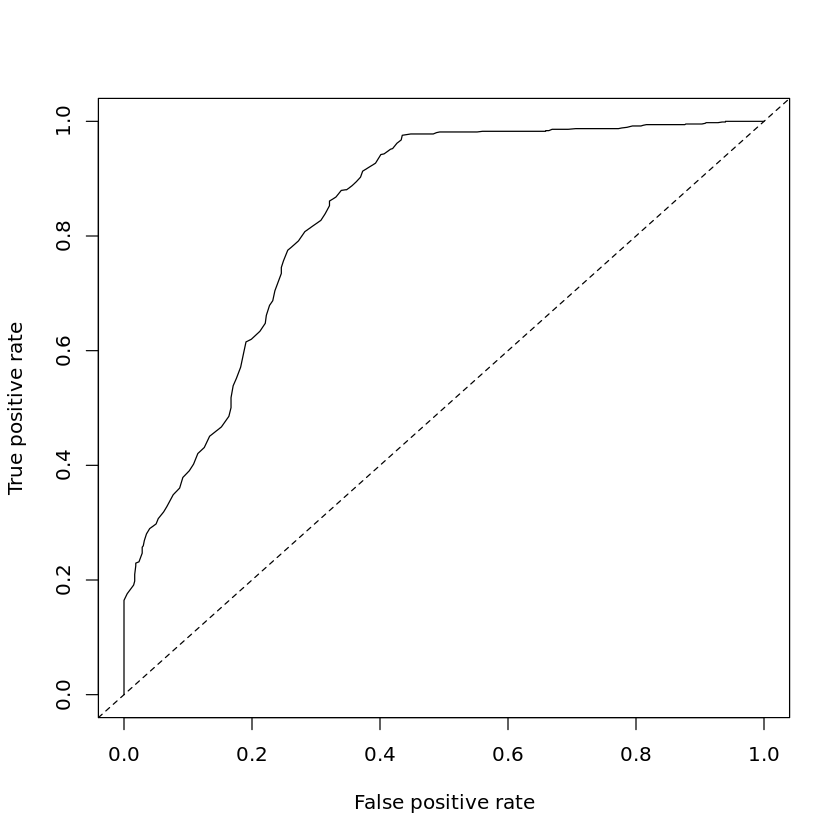

In [31]:
# [Place your Answer here]
library("ROCR")
testROC<-performance(prediction(HR_best_test$probs,HR_best_test$left),"tpr","fpr")
plot(testROC)
abline(a=0, b= 1,lty=2)
testAUC1<-as.double(performance(prediction(HR_best_test$probs,HR_best_test$left),"auc")@y.values)
testAUC1
#The AUC = 0.831329421749594

Of course, we have been ignoring all of the other predictors so far.

It is simple enough to modify the logistic regression to include others we have identified as important from Prac. 3.

Let's include satisfaction level, number of projects, and their interactions.

In [32]:
logfit2<-glm(left~average_montly_hours*satisfaction_level*number_project,data=HR_best_train,family=binomial)
summary(logfit2)


Call:
glm(formula = left ~ average_montly_hours * satisfaction_level * 
    number_project, family = binomial, data = HR_best_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0415  -0.4736   0.1602   0.6028   3.3437  

Coefficients:
                                                         Estimate Std. Error
(Intercept)                                             12.502769   4.928151
average_montly_hours                                    -0.101635   0.022492
satisfaction_level                                     -14.449688   7.765767
number_project                                          -3.618368   1.016518
average_montly_hours:satisfaction_level                  0.098241   0.034729
average_montly_hours:number_project                      0.024108   0.004455
satisfaction_level:number_project                        2.149072   1.686000
average_montly_hours:satisfaction_level:number_project  -0.014013   0.007359
                                            

Whilst the interpretation of the estimated coefficients becomes trickier for this model, for this practical we're only interested in its classification performance.

Let's evaluate the training performance of the classifier associated with this more complicated logistic regression model.

[1] 0.9064911

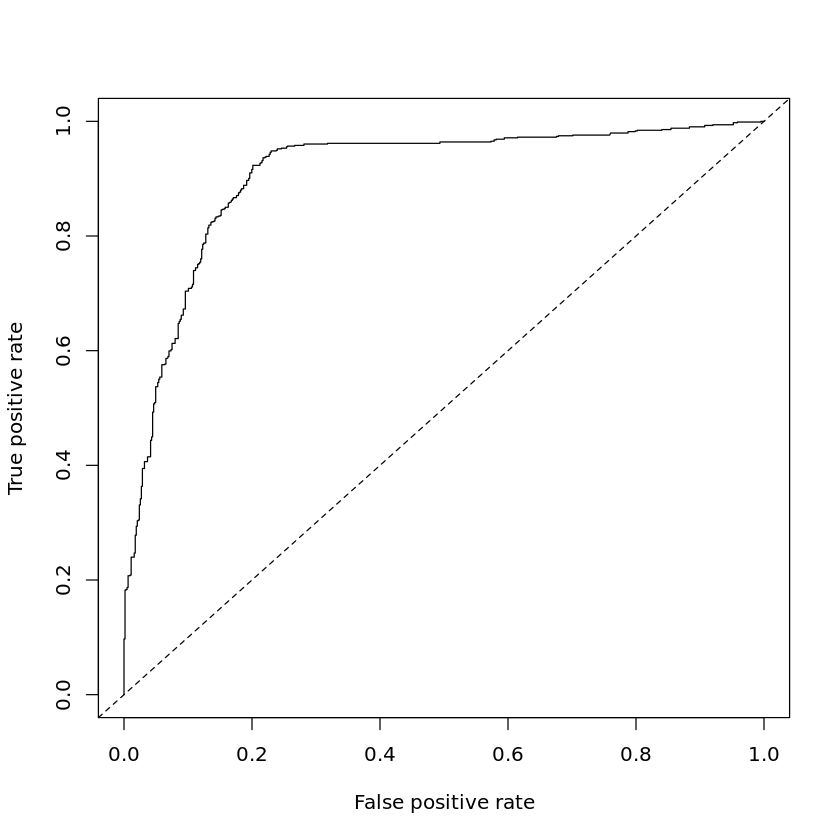

In [33]:
HR_best_train$probs2<-predict(logfit2,data.frame(average_montly_hours=HR_best_train$average_montly_hours,satisfaction_level=HR_best_train$satisfaction_level,number_project=HR_best_train$number_project),type="response")
trainROC2<-performance(prediction(HR_best_train$probs2,HR_best_train$left),"tpr","fpr")
plot(trainROC2)
abline(a=0, b= 1,lty=2)
trainAUC2<-as.double(performance(prediction(HR_best_train$probs2,HR_best_train$left),"auc")@y.values)
trainAUC2

Of course, the model fitted using more predictors produces a better classifier for the training data.

|<center>TASK</center>|
| ---- |
| Construct the ROC curve for the test data and compute the AUC for the new logistic regression model. What do you observe?  Comment on one potential pitfall associated with more complex models. |

[1] 0.9188566

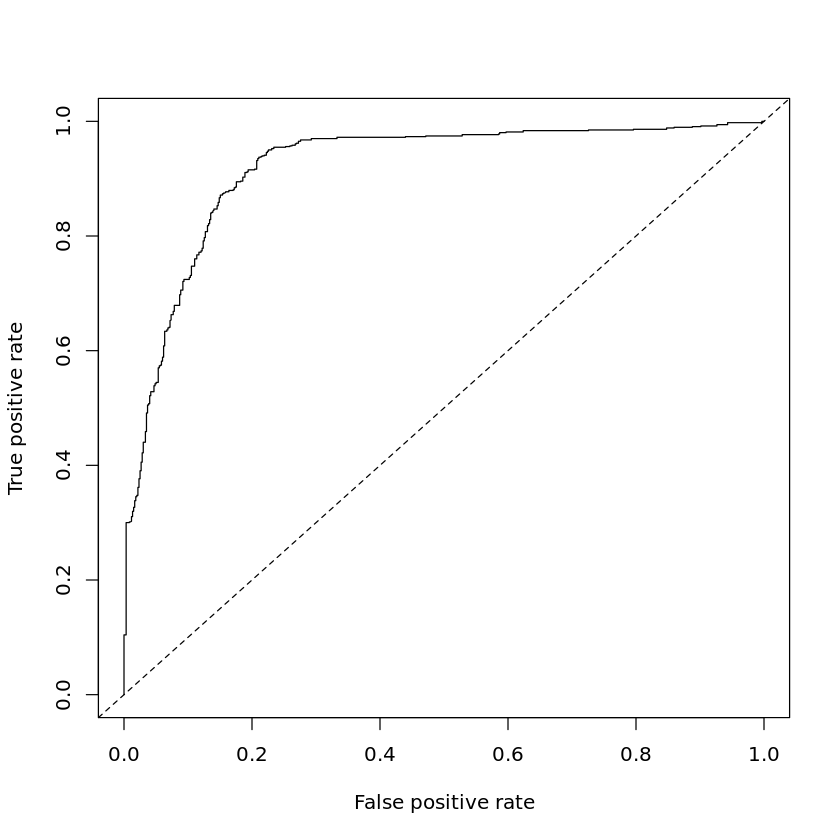

In [34]:
# [Place your Answer here]
HR_best_test$probs2<-predict(logfit2,data.frame(average_montly_hours=HR_best_test$average_montly_hours,satisfaction_level=HR_best_test$satisfaction_level,number_project=HR_best_test$number_project),type="response")
testROC2<-performance(prediction(HR_best_test$probs2,HR_best_test$left),"tpr","fpr")
plot(testROC2)
abline(a=0, b= 1,lty=2)
testAUC2<-as.double(performance(prediction(HR_best_test$probs2,HR_best_test$left),"auc")@y.values)
testAUC2
#The AUC is 0.918856598084771
#The precision at the beginning part of the chart is very low and then is becoming higher and steady.

**Model selection.** Next task explores CV's ability to select a good model.

|<center>TASK</center>|
| ---- |
| Calculate the 2-fold CV error of the more complex logistic regression classifier on the training set. Use the same two folds as for the old classifier, and use 0.5 as the threshold too. Does two fold CV help to find the classifier with better test set performance? Explain your answer.|

In [35]:
# [Place your Answer here]
HR_best_train$probs<-predict(logfit2,data.frame(average_montly_hours=HR_best_train$average_montly_hours,satisfaction_level=HR_best_train$satisfaction_level,number_project=HR_best_train$number_project),type="response")
HR_best_train$predleft<-as.integer(HR_best_train$probs>=0.5)
table(HR_best_train$predleft,HR_best_train$left)

HR_best_test$probs<-predict(logfit2,data.frame(average_montly_hours=HR_best_test$average_montly_hours,satisfaction_level=HR_best_test$satisfaction_level,number_project=HR_best_test$number_project),type="response")
HR_best_test$predleft<-as.integer(HR_best_test$probs>=0.5)
table(HR_best_test$predleft,HR_best_test$left)

#error_HR_best_train = (FP + FN) / (FP + FN + TP + TN) = 0.1397
#error_HR_best_test = (FP + FN) / (FP + FN + TP + TN) = 0.1342

#YES

#The 2-fold CV error of the more complex logistic regression classifier less than the single logistic regression classifier
#In two-fold crossvlidation, the dataset is randomly splited into two subsets. The size of both subsets are equal. 
#Firstly by comparing to the simple logistic regression, the two-fold cross-validation of complex logistic regression has smaller error rate which mean it is more accurate. 
#Secondly, a small value of K (K=2) always work towards validation set approach wheases a higher valure of K can improve the accuracy of the measurement.




   
      0   1
  0 503  81
  1 123 753

   
      0   1
  0 474  72
  1 124 791

### Other Classification Techniques

It is relatively easy to carry out classification using other supervised learning techniques.

There are very well-written implementations of many other algorithms not discussed in this course, such as LDA (linear discriminative anaysis), QDA (quadratic discriminative analysis). Training and prediction using these models can generally be done using functions with similar structure as in previous examples, except that there may be algorithm specific parameters that we need to specify.

We illustrate how to construct an LDA-based classifier using the three predictors and their interactions we had before, and evaluate it on our test data.

[1] 0.9130493

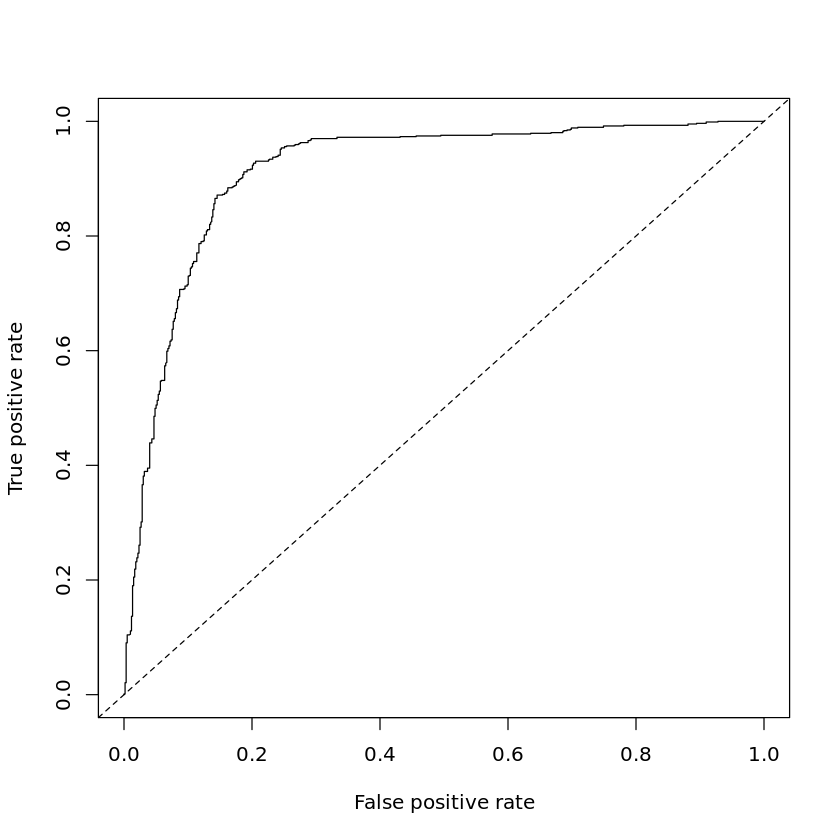

In [36]:
library("MASS")
ldafit<-lda(left~average_montly_hours*satisfaction_level*number_project,data=HR_best_train)
temp<-predict(ldafit,data.frame(average_montly_hours=HR_best_test$average_montly_hours,satisfaction_level=HR_best_test$satisfaction_level,number_project=HR_best_test$number_project),type="response")
HR_best_test$probs3<-temp$posterior[,2]
testROC3<-performance(prediction(HR_best_test$probs3,HR_best_test$left),"tpr","fpr")
plot(testROC3)
abline(a=0, b= 1,lty=2)
testAUC3<-as.double(performance(prediction(HR_best_test$probs3,HR_best_test$left),"auc")@y.values)
testAUC3

In addition to linear discriminant analysis, the `MASS` package has support for quadratic discriminant analysis via the command `qda`.  The `class` package has support for K nearest neighbours via `knn` and the `e1071` package has support for support vector machines via `svm`.

We've installed all of these packages for this practical.

|<center>TASK</center>|
| ---- |
| Choose **one** of the other classification techniques, train it to classify `left` from your training data, and test its performance on your test data.  Comment on how your classifier performs relative to the three simple classifiers we've explored in this part of the practical. |

[1] 0.9361293

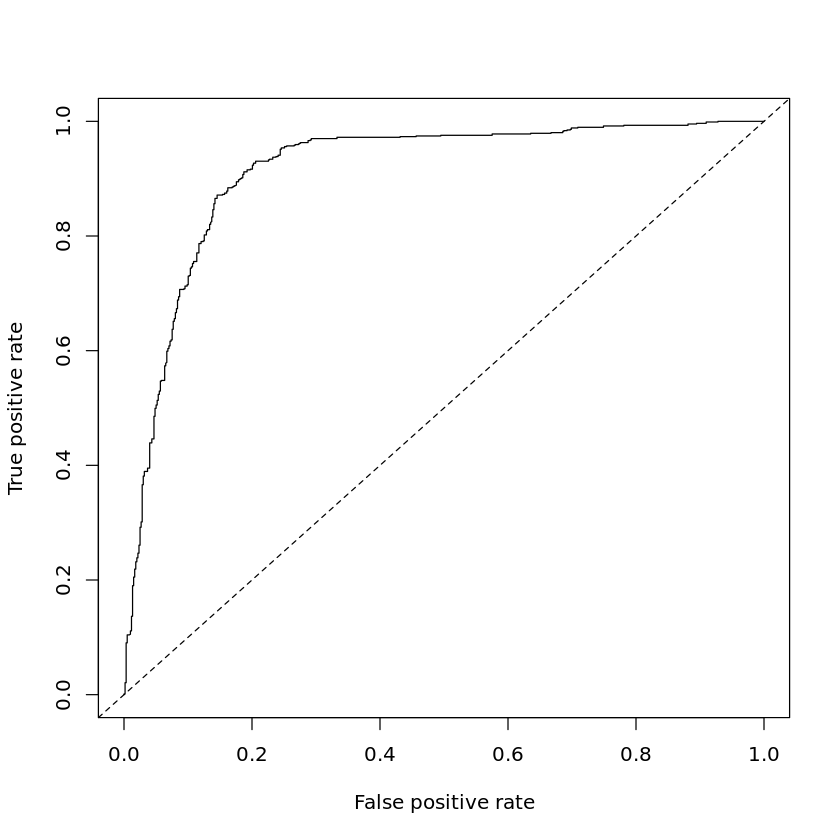

In [38]:
# [Place your Answer here]
library("MASS")
qdafit<-qda(left~average_montly_hours*satisfaction_level*number_project,data=HR_best_train)
temp<-predict(qdafit,data.frame(average_montly_hours=HR_best_test$average_montly_hours,satisfaction_level=HR_best_test$satisfaction_level,number_project=HR_best_test$number_project),type="response")
HR_best_test$probs4<-temp$posterior[,2]
testROC4<-performance(prediction(HR_best_test$probs3,HR_best_test$left),"tpr","fpr")
plot(testROC4)
abline(a=0, b= 1,lty=2)
testAUC4<-as.double(performance(prediction(HR_best_test$probs4,HR_best_test$left),"auc")@y.values)
testAUC4
#testAUC4=0.936129314788186 is bigger than others.
#Logistic regression is to predict qualitative response for an observtion and defines the probability of an observation belonging to a categoty or a goup, and works for continous data. 
#LDA is used when a linear boundary is required classifiers and QDA is used to find a non-linear boundary between classifiers. 
#QDA can accurately model a wider range of problems than the liner methods. QDA can perform better in the presence of a limited number of traiing observtions because it does make some assumptions about the form of the decision boundary.


## Unsupervised Learning

As a final exercise, let's subset all of our employee data again (not only best) to only include those that have left.

In Prac. 3, we visually identified several *clusters* of leavers.  We will now use the k-means clustering algorithm to capture these clusters.

In [39]:
HR_left<-HR_comma_sep[HR_comma_sep$left==1,]
head(HR_left)

satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0.38,0.53,2,157,3,0,1,0,sales,low
0.80,0.86,5,262,6,0,1,0,sales,medium
0.11,0.88,7,272,4,0,1,0,sales,medium
0.72,0.87,5,223,5,0,1,0,sales,low
0.37,0.52,2,159,3,0,1,0,sales,low
0.41,0.50,2,153,3,0,1,0,sales,low


Now, let's focus on three variables: average monthly hours, satisfaction level, and last evaluation.

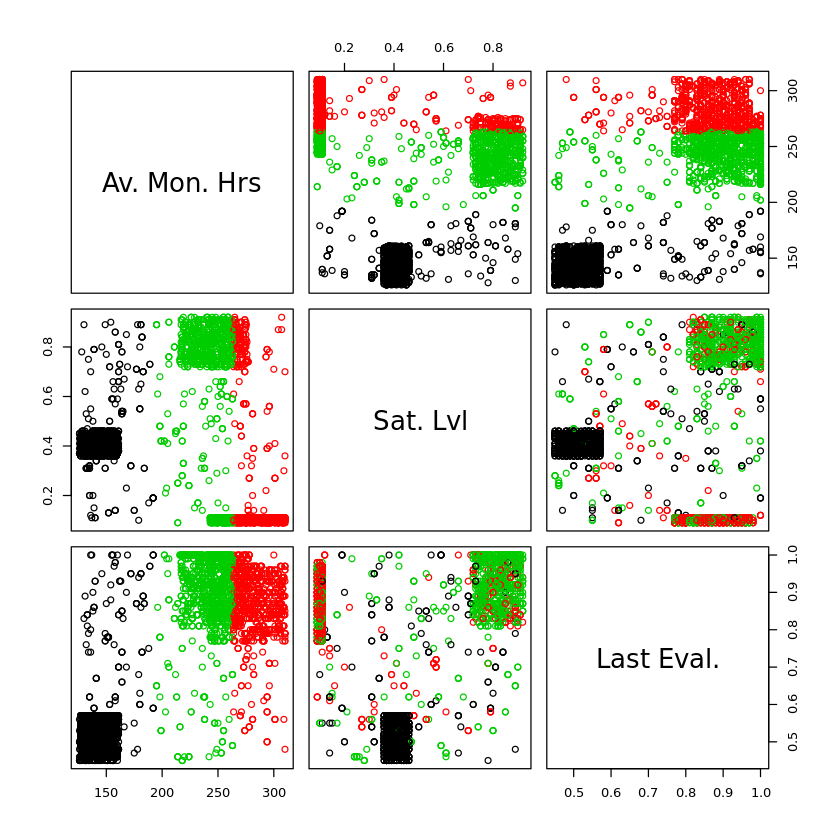

In [40]:
library("ggplot2") # Expanded plotting functionality over "lattice" package
x<-cbind(HR_left$average_montly_hours,HR_left$satisfaction_level,HR_left$last_evaluation)
kmfit<-kmeans(x,3,nstart=25) # Find the best 3 clusters using 25 random sets of (distinct) rows in x as initial centres.
pairs(x,col=(kmfit$cluster),labels=c("Av. Mon. Hrs","Sat. Lvl","Last Eval."))

One thing you will notice is that the three clusters that are found are not what we would expect.

This is because the variables are on different scales; since average monthly hours takes on values so much larger than  satisfaction level and last evaluation, the algorithm effectively prioritises just this variable.

A quick remedy to this problem is achieved by adjusting the scale of satisfaction level and last evaluation by a factor of 100.

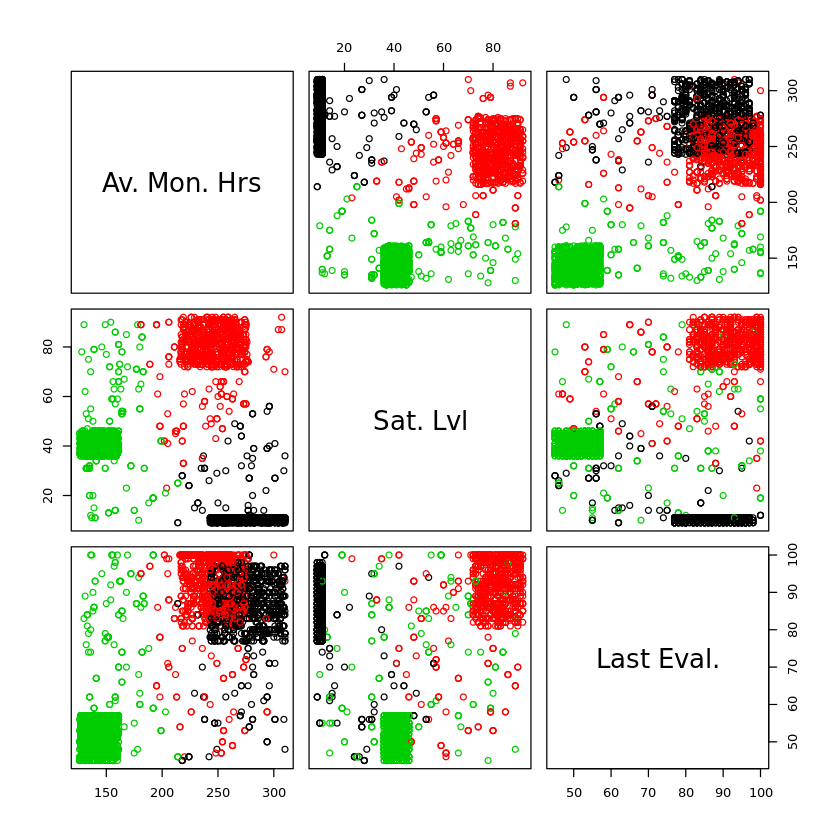

In [41]:
x<-cbind(HR_left$average_montly_hours,100*HR_left$satisfaction_level,100*HR_left$last_evaluation)
kmfit<-kmeans(x,3,nstart=25) # Find the best 3 clusters using 25 random restarts
pairs(x,col=(kmfit$cluster),labels=c("Av. Mon. Hrs","Sat. Lvl","Last Eval."))

|<center>TASK</center>|
| ---- |
| Partition the dataset into the three clusters we have just identified.  Use quantitative and visual EDA to explore the typical characteristics of each cluster.  Based on this, what is a possible explanation for the clusters? |

In [42]:
# [Place your Answer here]
#Cluster is a good technique to visualising high dimensional or multidimensional data. 
#It can organise things or observations that are close together and separate them into groups. 
#It can give a good view or help understand in a very high dimensional dataset.